<a href="https://colab.research.google.com/github/robnyland/gittest/blob/master/Federal_ID_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FACTDATA_SEP2022.TXT', header='infer')

<ipython-input-2-122ea0e9f5da>:1: DtypeWarning: Columns (3,4,6,8,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FACTDATA_SEP2022.TXT', header='infer')


In [ ]:
data.shape

(2180296, 20)

In [ ]:
data['OCC'] = data['OCC'].apply(lambda x: str(x))

In [ ]:
ed_data = data[data['OCC'].isin(['1700','1701','1702','1710','1712', '1715','1720','1725','1730','1740','1750','1799'])]
iss_data = data[data['OCC'].isin(['1750'])]

In [ ]:
 iss_data.to_csv('/content/drive/MyDrive/Colab Notebooks/1750.csv')

In [ ]:
data['OCC'].str.startswith('17').value_counts()

False    2140896
True       39400
Name: OCC, dtype: int64

In [ ]:
# Total length of all of the education data should be 38961
ed_data['OCC'].value_counts()

1701    12822
1712     9786
1702     6431
1710     4969
1750     2322
1740      882
1715      715
1720      600
1730      103
1725       49
1799       12
Name: OCC, dtype: int64

In [ ]:
data.head()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,0340,2,ES,ES-**,S,XXXX,2,50,F,1,202209,1,199500.0,19.3
1,AA00,11,I,15,NaN,H,0905,1,ES,ES-**,S,XXXX,2,50,F,1,202209,1,193000.0,29.7
2,AA00,11,E,15,15.0,E,0905,1,99,GS-15,O,XXXX,8,30,F,1,202209,1,158383.0,11.0
3,AA00,11,F,15,13.0,E,0905,1,99,GS-13,L,XXXX,8,30,F,1,202209,1,121065.0,13.9
4,AA00,11,G,15,14.0,E,0905,1,99,GS-14,M,XXXX,8,30,F,1,202209,1,138856.0,10.3


In [ ]:
iss_data['AGYSUB'].value_counts

<bound method IndexOpsMixin.value_counts of 1565       AF07
3419       AF0B
3619       AF0B
3636       AF0B
5056       AF0D
           ... 
2131620    VATA
2145130    VATA
2153367    VATA
2167525    VATA
2178943    VATA
Name: AGYSUB, Length: 2322, dtype: object>

<Axes: xlabel='SALARY', ylabel='OCC'>

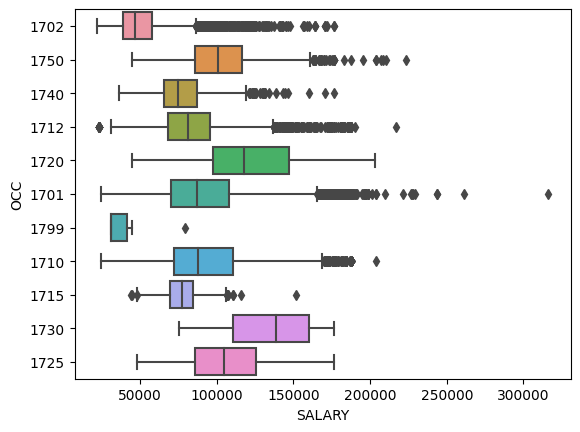

In [ ]:
sns.boxplot(data=ed_data, x='SALARY', y='OCC')
#sns.stripplot(data=ed_data, x='SALARY', y='OCC', size=4, color='.3')

In [ ]:
ed_data_totals = ed_data.groupby(by='OCC').agg(count=('AGYSUB','count'),median_salary=('SALARY','median'))
ed_data_totals


,count,median_salary
OCC,,
1701,12822,87163.0
1702,6431,46953.0
1710,4969,88088.0
1712,9786,81540.0
1715,715,77247.0
1720,600,117505.0
1725,49,104873.0
1730,103,138868.0
1740,882,74950.0


In [ ]:
ed_data_totals['%'] = 100 * ed_data_totals['count'] / ed_data_totals['count'].sum()
ed_data_totals
OCC_index = {'1701': '1701 - General Education and Training', '1702':'1702 - Education and Training Technician', '1710':'1710 - Education and Vocational Training', '1712':'1712 - Training Instruction','1715':'1715 - Vocational Rehabilitation','1720':'1720 - Education Program', '1725':'1725 - Public Health Educator','1730': '1730 - Education Research', '1740': '1740 - Education Services','1750':'1750 - Instructional Systems', '1799': '1799 - Education Student Trainee'}
ed_data_totals.rename(index=OCC_index,inplace=True)
ed_data_totals.reset_index(inplace=True)

In [ ]:
ed_data_totals

,OCC,count,median_salary,%
0,1701 - General Education and Training,12822,87163.0,33.139490
1,1702 - Education and Training Technician,6431,46953.0,16.621437
2,1710 - Education and Vocational Training,4969,88088.0,12.842780
3,1712 - Training Instruction,9786,81540.0,25.292704
4,1715 - Vocational Rehabilitation,715,77247.0,1.847975
5,1720 - Education Program,600,117505.0,1.550748
6,1725 - Public Health Educator,49,104873.0,0.126644
7,1730 - Education Research,103,138868.0,0.266212
8,1740 - Education Services,882,74950.0,2.279600
9,1750 - Instructional Systems,2322,100530.0,6.001396


[Text(0.5, 0, '# of Employees'),
 Text(0, 0.5, 'Occupational Series'),
 Text(0.5, 1.0, 'Number of Employees in 1700 (Education) Occupational Series')]

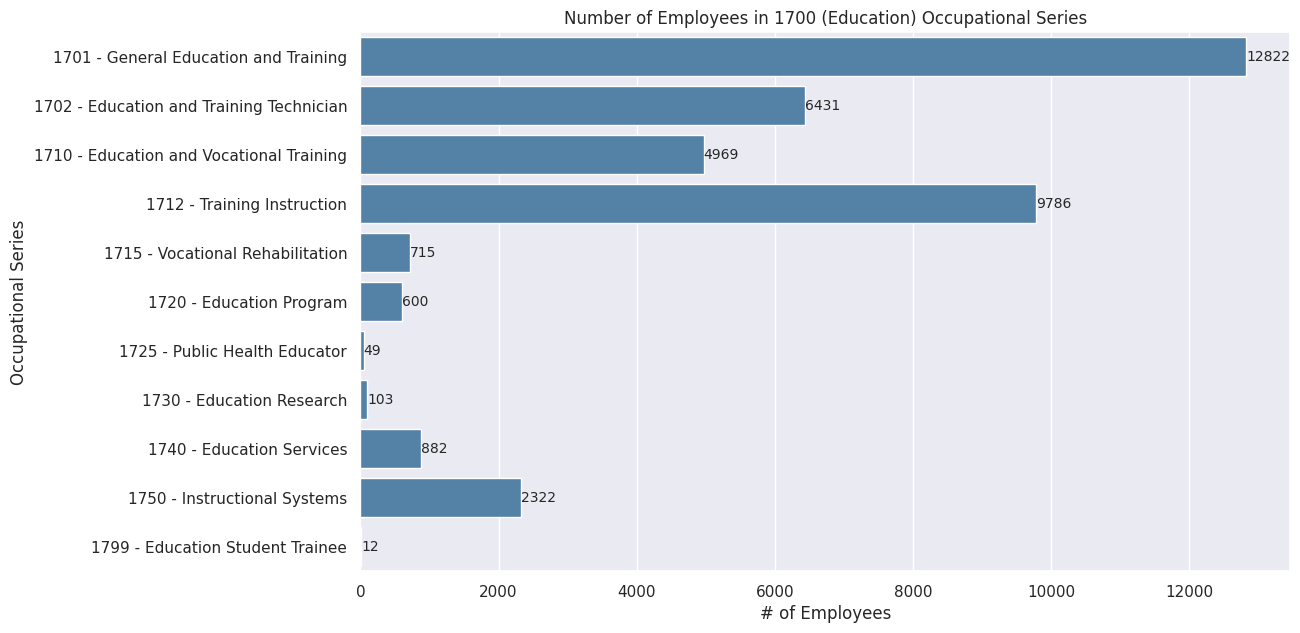

In [ ]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid", palette='pastel')
ax = sns.barplot(data=ed_data_totals,y='OCC', x='count',orient = 'h',color='steelblue')
for i in ax.containers:
  ax.bar_label(i,fontsize=10)

ax.set(xlabel='# of Employees', ylabel='Occupational Series', title="Number of Employees in 1700 (Education) Occupational Series")

In [ ]:
print(iss_data['SALARY'].describe())
print(iss_data['SALARY'].median())
print(iss_data['SALARY'].mean())


iss_data.describe()

count      2300.000000
mean     102818.319130
std       23076.660701
min       44740.000000
25%       86074.000000
50%      100530.000000
75%      116225.000000
max      223363.000000
Name: SALARY, dtype: float64
100530.0
102818.31913043479


,PATCO,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
count,2322.0,2322.000000,2322.0,2322.0,2300.000000,2322.000000
mean,1.0,1.110680,202209.0,1.0,102818.319130,12.272438
std,0.0,0.313804,0.0,0.0,23076.660701,8.481382
min,1.0,1.000000,202209.0,1.0,44740.000000,0.000000
25%,1.0,1.000000,202209.0,1.0,86074.000000,5.400000
50%,1.0,1.000000,202209.0,1.0,100530.000000,11.900000
75%,1.0,1.000000,202209.0,1.0,116225.000000,17.000000
max,1.0,2.000000,202209.0,1.0,223363.000000,48.900000


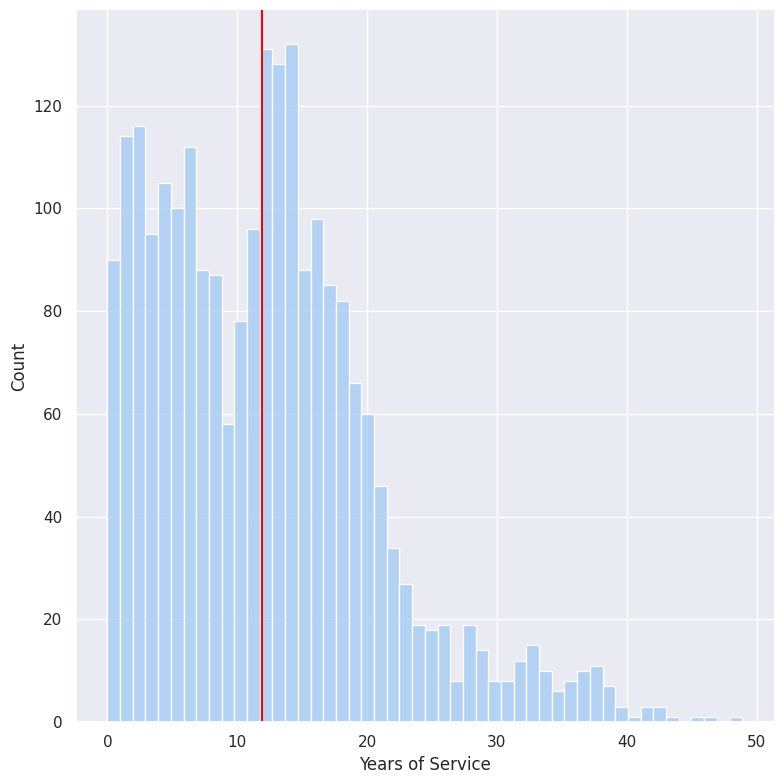

In [ ]:
sns.displot(data=iss_data, x='LOS', height=8, bins=50)
plt.xlabel ('Years of Service')
plt.axvline(x=iss_data['LOS'].median(),color='red')

<Axes: xlabel='SALARY', ylabel='PPGRD'>

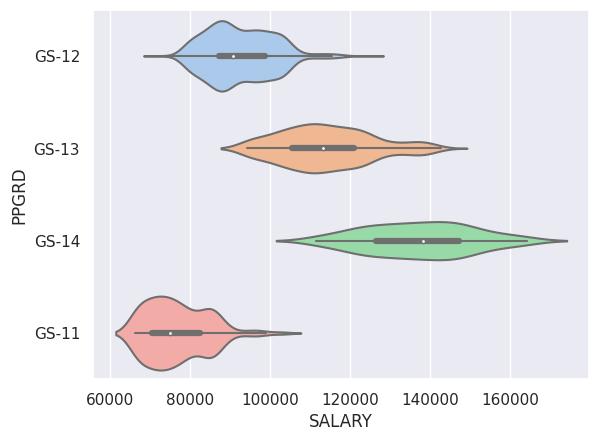

In [ ]:
sns.violinplot(data=iss_data[iss_data['PPGRD'].isin(['GS-11','GS-12','GS-13','GS-14'])], x='SALARY', y='PPGRD',height=11)

In [ ]:
pd.set_option('display.max_rows', 500)
print(iss_data['PPGRD'].value_counts(normalize=True))

GS-12    0.327304
GS-13    0.224376
GS-11    0.168389
GS-14    0.056848
TP-OE    0.037898
AD-10    0.028424
FV-J     0.014643
NH-03    0.011628
TP-OG    0.011628
GG-13    0.010336
GS-15    0.009475
TP-OM    0.008613
GS-09    0.007752
GG-12    0.006891
TP-OD    0.006029
CG-13    0.004737
NB-06    0.004307
AD-12    0.003876
NH-04    0.003445
GG-14    0.003445
DO-02    0.003445
FG-14    0.003445
AD-13    0.002584
AD-03    0.002584
SV-I     0.002584
GS-07    0.002584
NB-05    0.002584
AD-11    0.002153
DA-05    0.002153
FG-13    0.002153
NM-05    0.002153
NH-02    0.001723
AD-00    0.001723
SV-J     0.001292
NO-05    0.001292
SV-H     0.001292
CG-14    0.001292
CU-13    0.000861
IC-13    0.000861
FV-I     0.000861
NT-04    0.000861
ES-**    0.000861
NQ-**    0.000861
FP-03    0.000431
ZA-04    0.000431
FG-12    0.000431
FV-K     0.000431
GG-11    0.000431
DE-04    0.000431
DO-01    0.000431
GG-15    0.000431
GM-13    0.000431
NO-04    0.000431
EJ-04    0.000431
NT-05    0.000431
DA-06    0

In [ ]:
iss_data[iss_data['PPGRD'] == 'GS-09']

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
239408,AG34,13,D,04,09,A,1750,1,99,GS-09,E,XXXX,8,38,F,1,202209,1,54727.0,0.3
338917,ARCH,51,E,17,9.0,D,1750,1,99,GS-09,E,XXXX,8,10,F,1,202209,1,56818.0,9.2
340313,ARCH,13,E,17,9.0,B,1750,1,99,GS-09,E,XXXX,8,15,F,1,202209,1,58375.0,2.9
340868,ARCH,13,H,17,9.0,B,1750,1,99,GS-09,E,XXXX,8,15,F,1,202209,1,54727.0,1.3
341018,ARCH,51,D,13,9.0,B,1750,1,99,GS-09,E,XXXX,8,15,F,1,202209,1,56818.0,1.0
412726,ARTC,40,D,17.0,9.0,B,1750,1,99,GS-09,E,XXXX,8,15,F,1,202209,1,54727.0,1.3
1173236,HSCB,24,F,13,9.0,C,1750,1,99,GS-09,F,XXXX,8,10,F,1,202209,1,68142.0,3.3
1243561,IN15,12,I,17.0,9.0,E,1750,1,99,GS-09,F,XXXX,8,10,F,1,202209,1,69321.0,14.0
1244395,IN15,06,K,17.0,9.0,F,1750,1,99,GS-09,H,XXXX,8,10,F,1,202209,1,85154.0,19.3
1296360,NV18,12,G,17.0,9.0,A,1750,1,99,GS-09,E,XXXX,8,15,F,1,202209,1,54727.0,0.4


In [ ]:
iss_by_level = iss_data.groupby('PPGRD').agg(count=('LOS','count'),median_salary=('SALARY','median'), YOE=('LOS','median'))
iss_by_level['%'] = 100 * iss_by_level['count'] / iss_by_level['count'].sum()
iss_by_level



,count,median_salary,YOE,%
PPGRD,,,,
AD-00,4,135985.0,2.40,0.172265
AD-03,6,88778.0,10.95,0.258398
AD-05,1,103217.0,9.70,0.043066
AD-10,66,116533.0,10.30,2.842377
AD-11,5,121598.0,12.10,0.215332
AD-12,9,141079.0,7.80,0.387597
AD-13,6,161962.5,12.80,0.258398
AD-25,1,173662.0,26.20,0.043066
CG-12,1,119426.0,7.60,0.043066


In [ ]:
iss_data.drop(iss_data[iss_data['PPGRD'] == ['GS-11','GS-12','GS-13','GS-14']].index,inplace = True)

ValueError: ignored

In [ ]:
iss_data['EDLVL'] = iss_data['EDLVL'].astype(int).round()
iss_data['EDLVL'].value_counts()

In [ ]:
iss_data['PP'].value_counts()

In [ ]:
fedscope_1700 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedscope_1700.csv')

In [ ]:
fedscope_1700 = fedscope_1700.replace(',','',regex=True)
fedscope_1700[['SEP 2018', 'SEP 2019', 'SEP 2020', 'SEP 2021', 'SEP 2022']] = fedscope_1700[['SEP 2018', 'SEP 2019', 'SEP 2020', 'SEP 2021', 'SEP 2022']].astype(float)

In [ ]:
fedscope_1700.set_index('Employment as values',inplace=True)

In [ ]:
fedscope_1700

In [ ]:
stacked_fedscope = fedscope_1700.stack().columns(['Year', 'Number'])

In [ ]:
import seaborn as sns

In [ ]:
multi_index = pd.MultiIndex.from_product([['SEP 2018', 'SEP 2019', 'SEP 2020', 'SEP 2021', 'SEP 2022']])
fedscope_1700.index = multi_index